# Netflix Clustering

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("netflix_titles.csv")

In [13]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [15]:
 df = df[['type', 'rating', 'duration', 'listed_in']].dropna() #drop rows with missing data

In [19]:
df = df[df['type'] == 'Movie'] #include only movies

In [21]:
df['duration'] = df['duration'].str.replace(' min', '').astype(int) ## Convert duration to integer (in minutes)

In [23]:
df['genre'] = df['listed_in'].str.split(',').str[0] # Simplify genre - take only the first listed genre

In [52]:
# Encode genre and rating using Label Encoding
genre_le = LabelEncoder()
rating_le = LabelEncoder()

df['genre_encoded'] = genre_le.fit_transform(df['genre'])
df['rating_encoded'] = rating_le.fit_transform(df['rating'])


In [54]:
features = df[['duration', 'genre_encoded', 'rating_encoded']]

In [56]:
# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [58]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

In [60]:
# Dimensionality reduction for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)

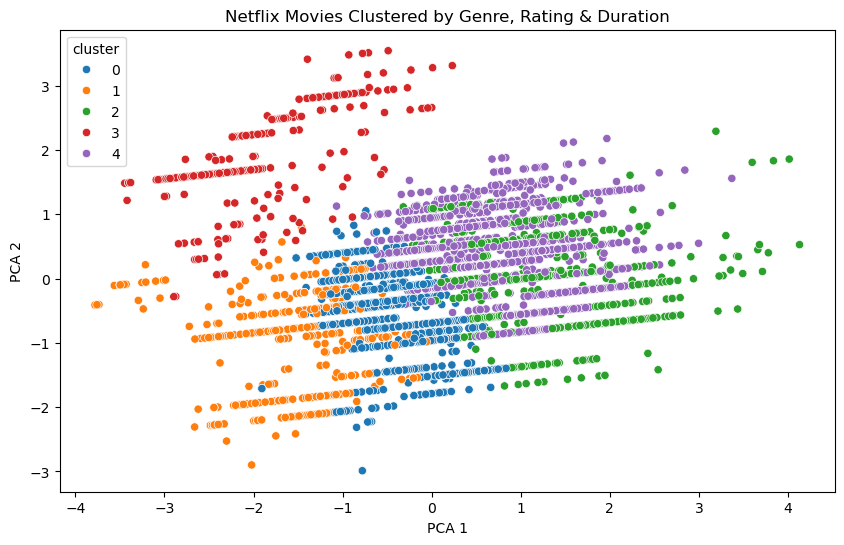

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df['cluster'], palette='tab10')
plt.title("Netflix Movies Clustered by Genre, Rating & Duration")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [64]:
# Elbow Method to find optimal number of clusters
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)



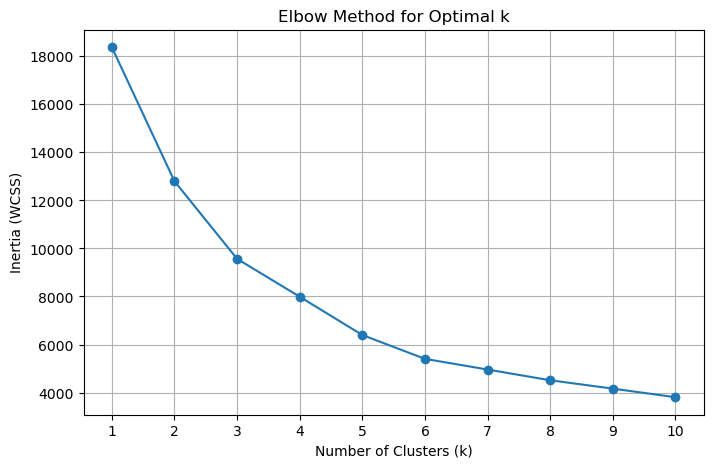

In [65]:

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.xticks(k_range)
plt.grid(True)
plt.show()

optimal value as evident above is 3 

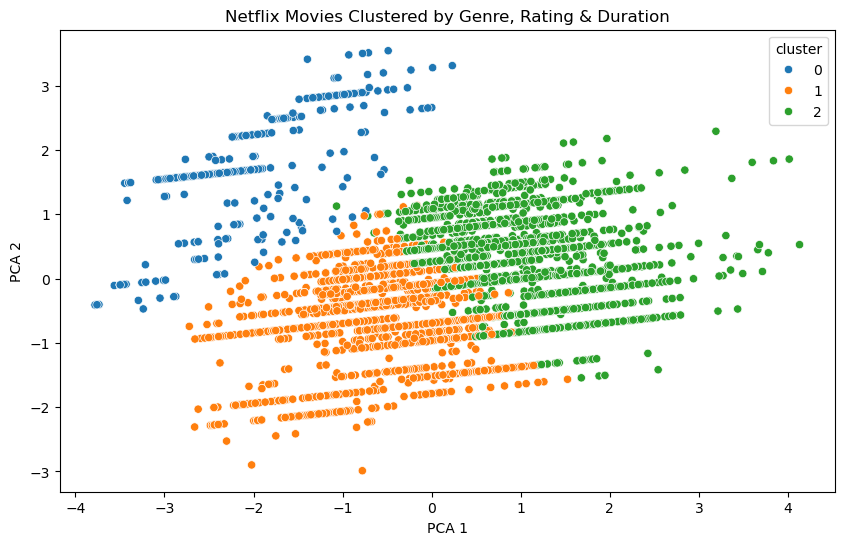

In [69]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)



pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_features)



plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=df['cluster'], palette='tab10')
plt.title("Netflix Movies Clustered by Genre, Rating & Duration")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [71]:
df['cluster'] = kmeans.labels_


In [75]:

# Group by cluster
summary = df.groupby('cluster')[['duration']].mean()
genre_counts = df.groupby('cluster')['genre'].agg(lambda x: x.value_counts().index[0])
rating_counts = df.groupby('cluster')['rating'].agg(lambda x: x.value_counts().index[0])

# Combine for a better view
cluster_summary = pd.DataFrame({
    'Avg Duration (min)': summary['duration'],
    'Most Common Genre': genre_counts,
    'Most Common Rating': rating_counts
})

print(cluster_summary)


         Avg Duration (min) Most Common Genre Most Common Rating
cluster                                                         
0                 70.280488   Stand-Up Comedy              TV-MA
1                 91.530941            Dramas              TV-MA
2                112.128143            Dramas              TV-14


In [77]:
cluster_labels = {
    0: 'Mature Dramas',
    1: 'Family Comedies',
    2: 'Action Thrillers'
}
df['cluster_label'] = df['cluster'].map(cluster_labels)


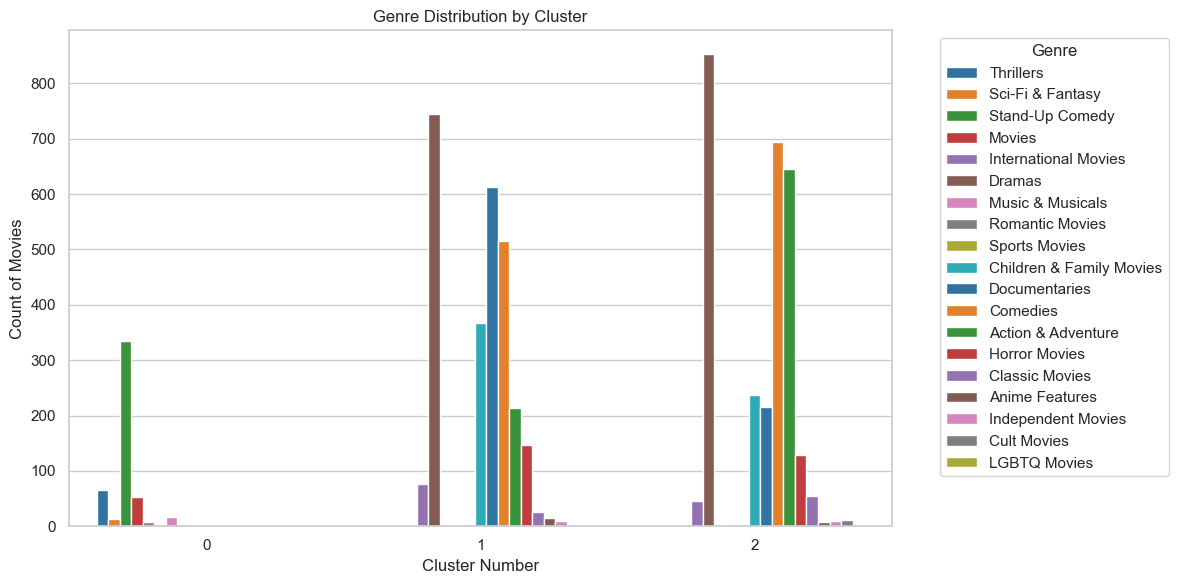

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cluster', hue='genre', palette='tab10')

plt.title('Genre Distribution by Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Count of Movies')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Genre')
plt.tight_layout()
plt.show()
